epoch 0
h(Mx0) = 0
h(Mx1) = 0
h(Mx2) = 0
h(Mx3) = 0
epoch 1
h(Mx0) = 11.57
h(Mx1) = 27.319999999999997
h(Mx2) = 43.07
h(Mx3) = 22.83
epoch 2
h(Mx0) = 13.305625000000001
h(Mx1) = 31.404175000000006
h(Mx2) = 49.502725000000005
h(Mx3) = 26.253225000000004
epoch 3
h(Mx0) = 13.570863374999998
h(Mx1) = 32.0144098125
h(Mx2) = 50.457956249999995
h(Mx3) = 26.774866125
epoch 4
h(Mx0) = 13.61619997296875
h(Mx1) = 32.1052663784375
h(Mx2) = 50.59433278390625
h(Mx3) = 26.862584559843754
epoch 5
h(Mx0) = 13.62859318722461
h(Mx1) = 32.11847561484649
h(Mx2) = 50.60835804246836
h(Mx3) = 26.88531694759336
epoch 6
h(Mx0) = 13.635995575363618
h(Mx1) = 32.12007982996245
h(Mx2) = 50.60416408456128
h(Mx3) = 26.898223583351708
epoch 7
h(Mx0) = 13.642587024741017
h(Mx1) = 32.119952839855024
h(Mx2) = 50.59731865496903
h(Mx3) = 26.909552639789602
epoch 8
h(Mx0) = 13.648993207131893
h(Mx1) = 32.11957081617338
h(Mx2) = 50.590148425214856
h(Mx3) = 26.920538532469745
epoch 9
h(Mx0) = 13.655308401711192
h(Mx1) = 32.11

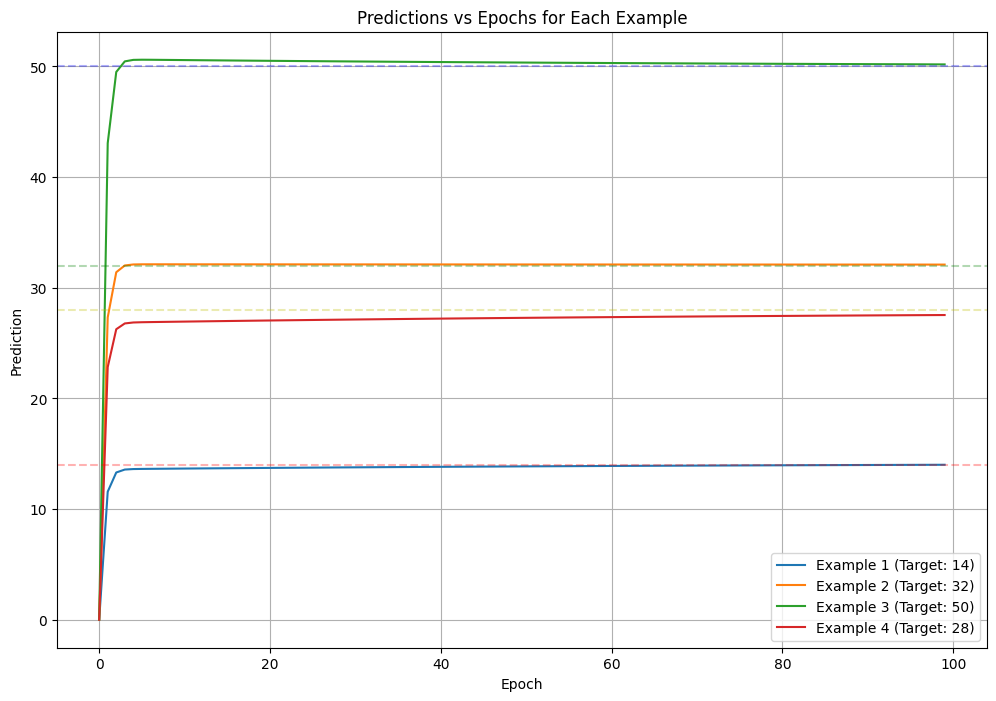


Final Results:
Example | Prediction | Actual | Error
----------------------------------------
      1 |     14.00 |     14 |  0.00
      2 |     32.09 |     32 |  0.09
      3 |     50.19 |     50 |  0.19
      4 |     27.54 |     28 |  0.46
Coffienet of determination: 0.9996080179100272


In [1]:
import numpy as np

X = [
    [1, 2, 3],  # Example 1
    [4, 5, 6],  # Example 2
    [7, 8, 9],  # Example 3
    [2, 4, 6]   # Example 4
]
y = [14, 32, 50, 28]  # Target values

# Initial parameters
theta = [0, 0, 0, 0]  # [theta_0, theta_1, theta_2, theta_3]
alpha = 0.01          # Learning rate
epochs = 100         # Number of iterations


M = len(X)
N = len(X[0])
predictions_history = np.zeros((M, epochs))
# get hypothesis
def hypothesis(x, theta):
    return theta[0] + sum(theta[i + 1] * x[i] for i in range(len(x)))

for epoch in range(epochs):
    print(f"epoch {epoch}")
    errors = []
    predictions = []

    for i in range(M):
        h = hypothesis(X[i], theta)
        print(f"h(Mx{i}) = {h}")
        predictions.append(h)
        errors.append(h - y[i])
        predictions_history[i][epoch] = h
    # update theta
    theta[0] = theta[0] - alpha * 1 / M * sum(errors)
    for j in range(N):
        theta[j + 1] = theta[j + 1] - alpha * 1/M * sum((predictions[i] - y[i])* X[i][j] for i in range(M))


# After all epochs complete, plot the results
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 8))

# Plot predictions for each example
for i in range(M):
    plt.plot(range(epochs), predictions_history[i], label=f'Example {i+1} (Target: {y[i]})')

plt.axhline(y=y[0], color='r', linestyle='--', alpha=0.3)
plt.axhline(y=y[1], color='g', linestyle='--', alpha=0.3)
plt.axhline(y=y[2], color='b', linestyle='--', alpha=0.3)
plt.axhline(y=y[3], color='y', linestyle='--', alpha=0.3)

plt.xlabel('Epoch')
plt.ylabel('Prediction')
plt.title('Predictions vs Epochs for Each Example')
plt.legend()
plt.grid(True)
plt.show()

# Print final predictions vs actual values
print("\nFinal Results:")
print("Example | Prediction | Actual | Error")
print("-" * 40)
for i in range(M):
    final_pred = predictions_history[i][-1]
    print(f"{i+1:7d} | {final_pred:9.2f} | {y[i]:6d} | {abs(final_pred - y[i]):5.2f}")

# calculate the coffience of determinatio 
ymean = sum(y) / len(y)
ssres = sum((y[i] - predictions_history[i][-1]) ** 2 for i in range(M)) / sum((y[i] - ymean)**2 for i in range(M))
print(f"Coffienet of determination: {1 - ssres}")

In [4]:
result = hypothesis([6,5,7], theta)
print(result)

37.385979922070916
